## Useful functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import *

## One run plots:

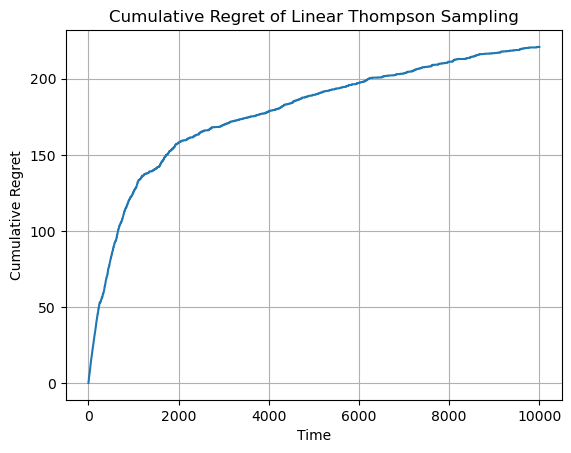

Total number of iterations in calculate.mle :  13850.0
Average number of iteration per rounds in calculate.mle:  1.385


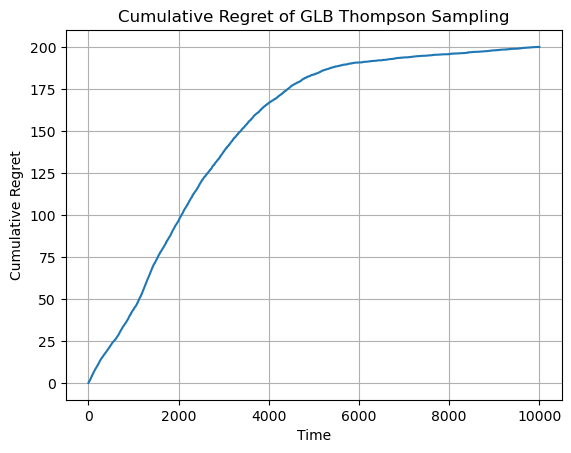

In [2]:
# Initialize the environment and the bandit.
d = 5
num_items = 10
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d

regrets, errors = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'linear')
plot_regret(regrets, "Cumulative Regret of Linear Thompson Sampling")

num_rounds = 10000
regrets2, errors2 = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'logistic')
plot_regret(regrets2, "Cumulative Regret of GLB Thompson Sampling")

## Linear Bandit over 100 runs

Total progress:   0%|          | 0/100 [00:00<?, ?it/s]

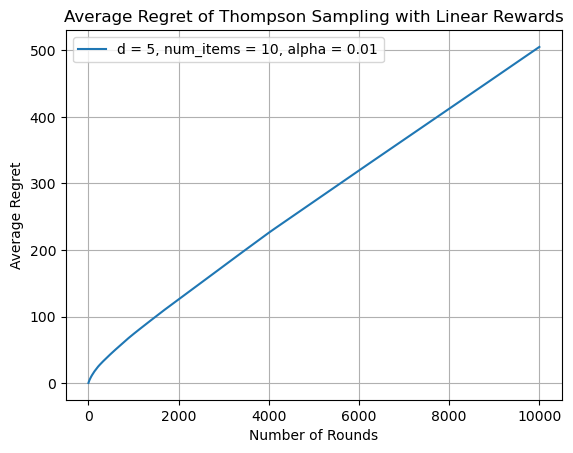

In [12]:
# Setup
d_values = [5]
num_items = [10]
alpha_values = [0.01]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 100
all_average_regrets = run_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs, type= 'linear')

## Generalized Linear Bandit over 50 runs

Total progress:   0%|          | 0/50 [00:00<?, ?it/s]

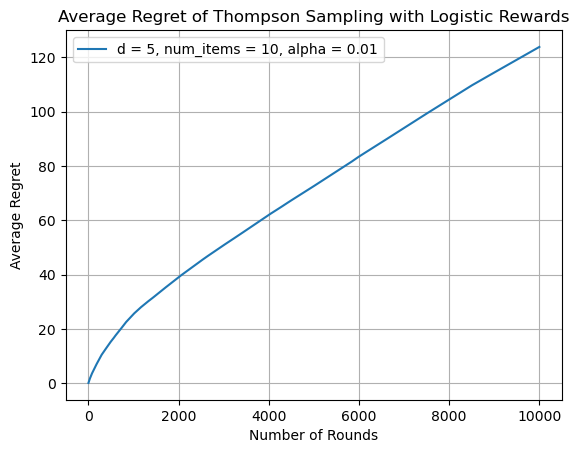

In [14]:
# Setup
d_values = [5]
num_items = [10]
alpha_values = [0.01]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 50
all_average_regrets = run_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs, type= 'logistic')

## Varying parameters

### Variation of the number of dimensions

In [ ]:
d_values = [3, 10, 33, 50]
num_items = [10]
alpha_values = [0.1]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 10
all_average_regrets = run_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs, type= 'logistic')

### Variation of the number of items

Total progress:   0%|          | 0/40 [00:00<?, ?it/s]

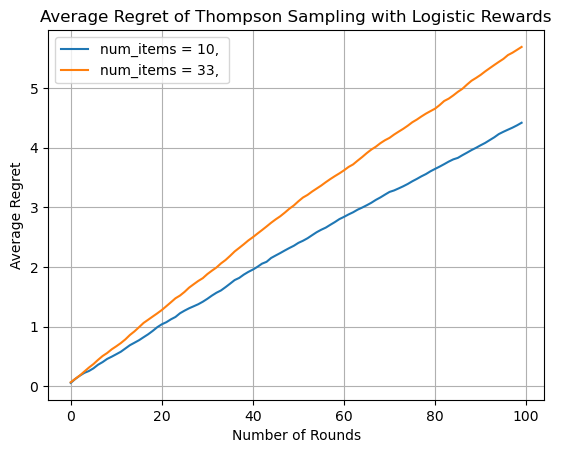

In [ ]:
d_values2 = [5]
num_items2 = [10, 33, 100, 333, 1000]
alpha_values2 = [0.1]
num_rounds2 = 10000
sigma_noise2 = 1.0
nbr_runs2 = 20

all_average_regrets = run_experiments(d_values2, num_items2, alpha_values2, num_rounds2, sigma_noise2, nbr_runs2, type= 'logistic')

### Variation of the number of alphas

Experiment 1 out of 4
Experiment 2 out of 4
Experiment 3 out of 4
Experiment 4 out of 4
Run 0 out of 20
Run 1 out of 20
Run 2 out of 20
Run 3 out of 20
Run 4 out of 20
Run 5 out of 20
Run 6 out of 20
Run 7 out of 20
Run 8 out of 20
Run 9 out of 20
Run 10 out of 20
Run 11 out of 20
Run 12 out of 20
Run 13 out of 20
Run 14 out of 20
Run 15 out of 20
Run 16 out of 20
Run 17 out of 20
Run 18 out of 20
Run 19 out of 20


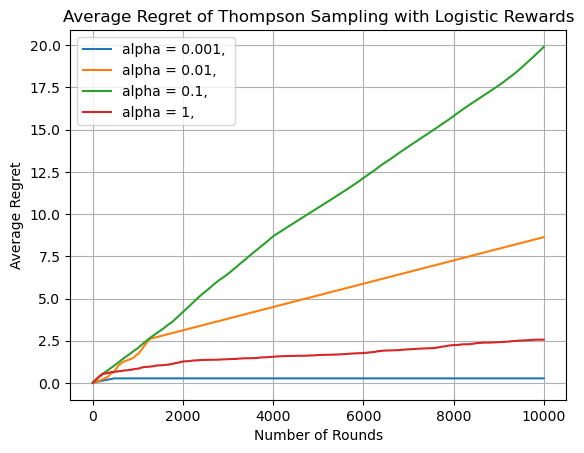

In [7]:
d_values3 = [5]
num_items3 = [10]
alpha_values3 = [0.001, 0.01, 0.1, 1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 50

all_average_regrets = run_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3, type= 'logistic')

## Comparing GLB TS and Linear TS

### Variation of the number of dimensions

In [4]:
d_values = [3, 10, 33, 50]
num_items = [10]
alpha_values = [0.1]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 10

average_regrets_all = run_versus_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs)


Experiment 1 out of 8
Experiment 2 out of 8
Experiment 3 out of 8
Experiment 4 out of 8
Experiment 5 out of 8
Experiment 6 out of 8


### Variation of the number of items

Experiment 1 out of 8
Experiment 2 out of 8
Experiment 3 out of 8
Experiment 4 out of 8
Experiment 5 out of 8
Experiment 6 out of 8
Experiment 7 out of 8
Run 0 out of 20
Run 1 out of 20
Run 2 out of 20
Run 3 out of 20
Run 4 out of 20
Run 5 out of 20
Run 6 out of 20
Run 7 out of 20
Run 8 out of 20
Run 9 out of 20
Run 10 out of 20
Run 11 out of 20
Run 12 out of 20
Run 13 out of 20
Run 14 out of 20
Run 15 out of 20
Run 16 out of 20
Run 17 out of 20
Run 18 out of 20
Run 19 out of 20
Experiment 8 out of 8
Run 0 out of 20
Run 1 out of 20
Run 2 out of 20
Run 3 out of 20
Run 4 out of 20
Run 5 out of 20
Run 6 out of 20
Run 7 out of 20
Run 8 out of 20
Run 9 out of 20
Run 10 out of 20
Run 11 out of 20
Run 12 out of 20
Run 13 out of 20
Run 14 out of 20
Run 15 out of 20
Run 16 out of 20
Run 17 out of 20
Run 18 out of 20
Run 19 out of 20


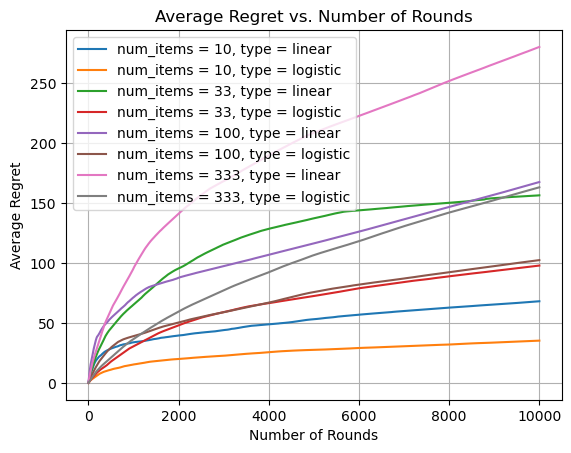

In [4]:
d_values2 = [5]
num_items2 = [10, 33, 100, 333]
alpha_values2 = [0.1]
num_rounds2 = 10000
sigma_noise2 = 1.0
nbr_runs2 = 20

average_regrets_all = run_versus_experiments(d_values2, num_items2, alpha_values2, num_rounds2, sigma_noise2, nbr_runs2)

### Variation of the number of alphas

Experiment 1 out of 6
Experiment 2 out of 6
Experiment 3 out of 6
Experiment 4 out of 6
Experiment 5 out of 6
Run 0 out of 20
Run 1 out of 20
Run 2 out of 20
Run 3 out of 20
Run 4 out of 20
Run 5 out of 20
Run 6 out of 20
Run 7 out of 20
Run 8 out of 20
Run 9 out of 20
Run 10 out of 20
Run 11 out of 20
Run 12 out of 20
Run 13 out of 20
Run 14 out of 20
Run 15 out of 20
Run 16 out of 20
Run 17 out of 20
Run 18 out of 20
Run 19 out of 20
Experiment 6 out of 6
Run 0 out of 20
Run 1 out of 20
Run 2 out of 20
Run 3 out of 20
Run 4 out of 20
Run 5 out of 20
Run 6 out of 20
Run 7 out of 20
Run 8 out of 20
Run 9 out of 20
Run 10 out of 20
Run 11 out of 20
Run 12 out of 20
Run 13 out of 20
Run 14 out of 20
Run 15 out of 20
Run 16 out of 20
Run 17 out of 20
Run 18 out of 20
Run 19 out of 20


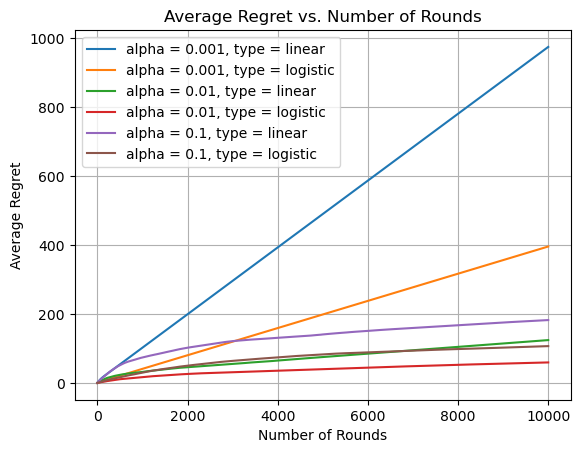

In [3]:
d_values3 = [5]
num_items3 = [10]
alpha_values3 = [0.001, 0.01, 1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 20

average_regrets_all = run_versus_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3)